# Training the YOLOv8 Model (RGB / IR)

In [1]:
# missing yolo dep
!pip install lapx>=0.5.2

In [1]:
import cv2 as cv
from glob import glob
import matplotlib.pyplot as plt
import os
import random
from ultralytics import YOLO

## YOLOv8 Nano (RGB+IR)

In [ ]:
# unzip downloaded dataset to `./datasets`
dataset_combined = 'datasets/data_combined.yaml'

# load a model
backbone_nano = YOLO("yolov8n.yaml")  # build a new model from scratch

### Model Training

In [4]:
# Train the model
results_n = backbone_nano.train(data=dataset_combined, epochs=20)

New https://pypi.org/project/ultralytics/8.0.180 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.173 🚀 Python-3.10.11 torch-2.0.1 CUDA:0 (NVIDIA GeForce GTX 1060 6GB, 6070MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=datasets/data_combined.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, au

> 20 epochs completed in 2.531 hours.

| Epoch | GPU_mem | box_loss | cls_loss | dfl_loss | Instances |
| -- | -- | -- | -- | -- | -- |
| 10/20 | 3.18G | 1.655 | 1.208 | 1.154 | 179 |
| Class | Images | Instances | P | R | mAP50 | mAP50-95 |
| all | 2229 | 33597 | 0.545 | 0.208 | 0.226 | 0.119 |

| Epoch | GPU_mem | box_loss | cls_loss | dfl_loss | Instances |
| -- | -- | -- | -- | -- | -- |
| 20/20 | 2.6G | 1.458 | 0.9884 | 1.073 | 52 |
| Class | Images | Instances | P | R | mAP50 | mAP50-95 |
| all | 2229 | 33597 | 0.52 | 0.242 | 0.272 | 0.147 |

> YOLOv8n summary (fused): 168 layers, 3008768 parameters, 0 gradients

| Class | Images | Instances | P | R |  mAP50 | mAP50-95 |
| -- | -- | -- | -- | -- | -- | -- |
| all | 2229 | 33597 | 0.522 | 0.241 | 0.272 | 0.147 |
| person | 2229 | 7693 | 0.624 | 0.48 | 0.526 | 0.253 |
| bike | 2229 | 363 | 0.288 | 0.27 | 0.239 | 0.128 |
| car | 2229 | 14413 | 0.689 | 0.644 | 0.696 | 0.46 |
| motor | 2229 | 132 | 0.611 | 0.364 | 0.419 | 0.193 |
| train | 2229 | 362 | 0.675 | 0.344 | 0.425 | 0.281 |
| truck | 2229 | 4238 | 0.492 | 0.235 | 0.255 | 0.0951 |
| hydrant | 2229 | 220 | 0.688 | 0.0955 | 0.162 | 0.0659 |
| sign | 2229 | 6053 | 0.592 | 0.205 | 0.252 | 0.13 |
| skateboard | 2229 | 7 | 0 | 0 | 0 | 0 |
| stroller | 2229 | 13 | 1 | 0 | 0 | 0 |
| other vehicle | 2229 | 103 | 0.0798 | 0.0194 | 0.0232 | 0.00977 |


> _Speed: 0.2ms preprocess, 4.0ms inference, 0.0ms loss, 0.6ms postprocess per image_

![Training the YOLOv8 Model (RGB)](./assets/backbone_combined_nano_results.webp)

(-0.5, 1919.5, 1555.5, -0.5)

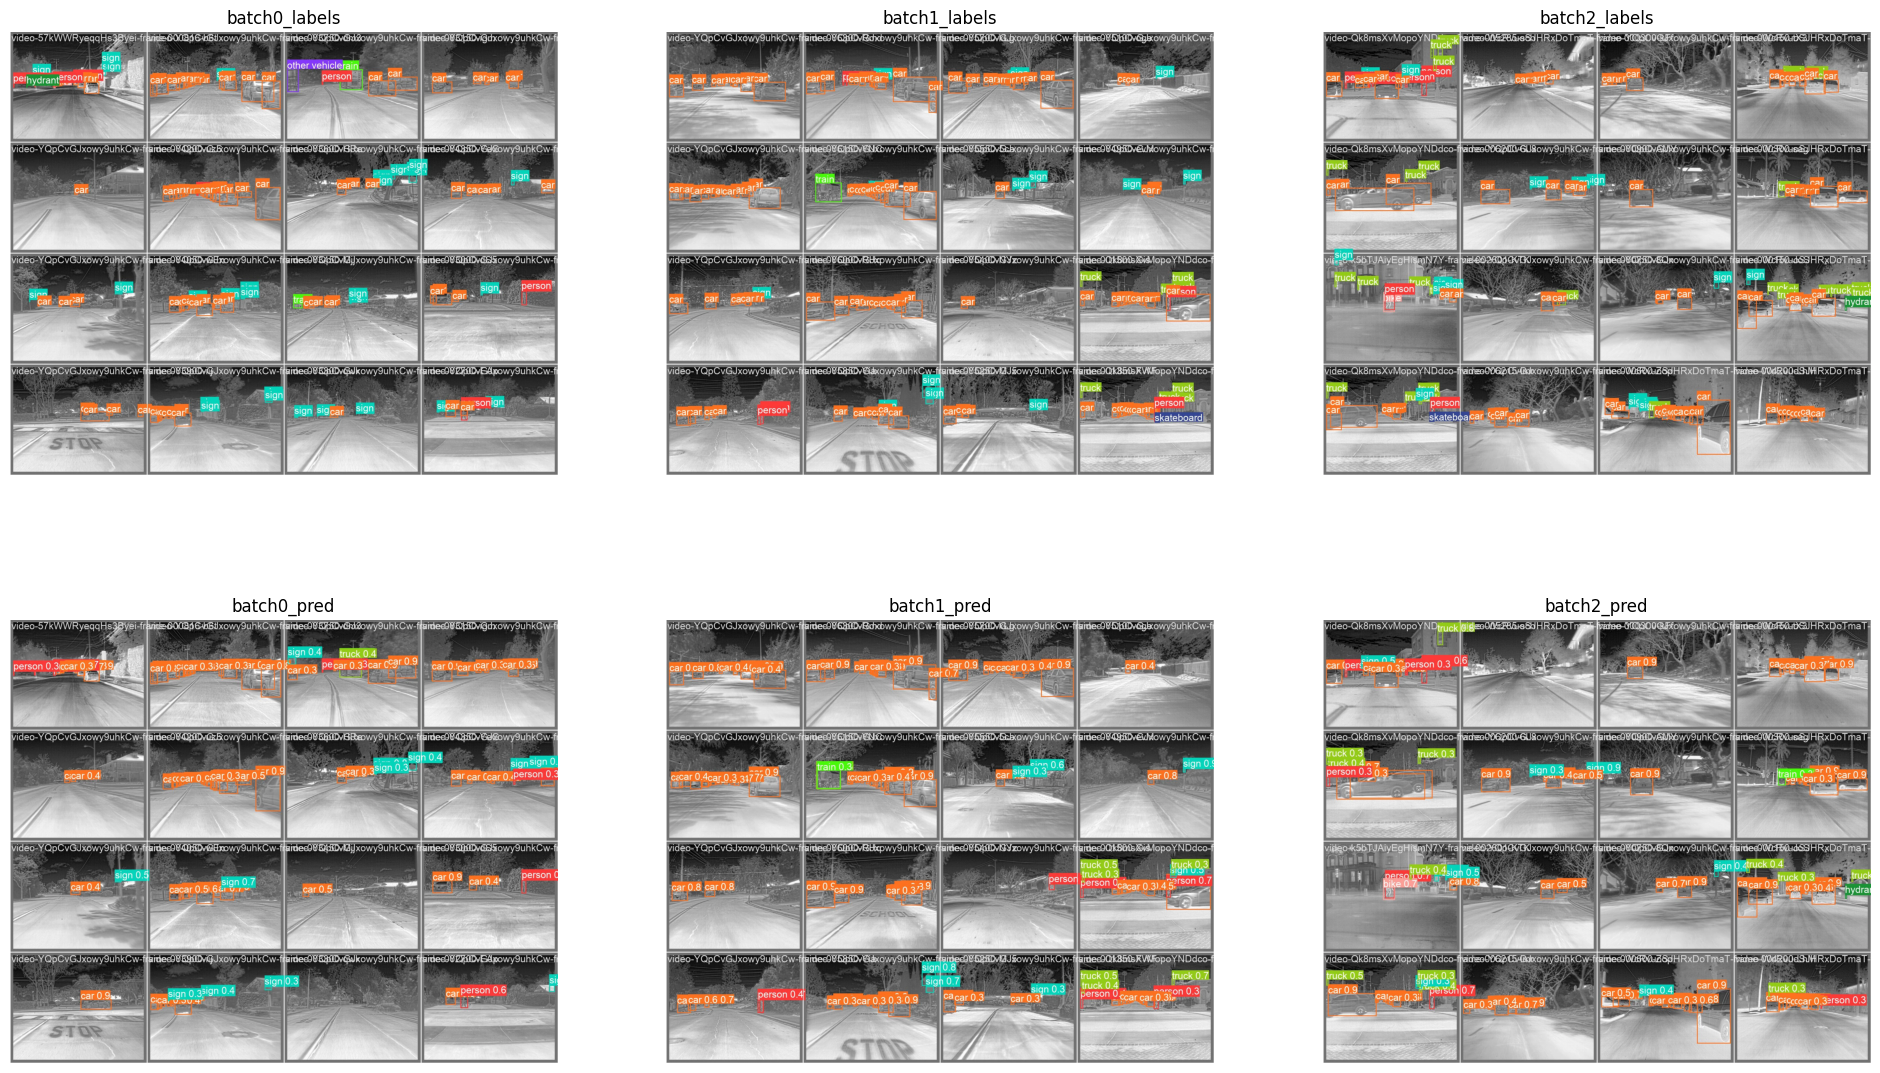

In [2]:
plt.figure(figsize=(24, 14))

im_batch0_labels = plt.imread('./assets/backbone_combined_nano_val_batch0_labels.webp')
im_batch0_pred = plt.imread('./assets/backbone_combined_nano_val_batch0_pred.webp')
im_batch1_labels = plt.imread('./assets/backbone_combined_nano_val_batch1_labels.webp')
im_batch1_pred = plt.imread('./assets/backbone_combined_nano_val_batch1_pred.webp')
im_batch2_labels = plt.imread('./assets/backbone_combined_nano_val_batch2_labels.webp')
im_batch2_pred = plt.imread('./assets/backbone_combined_nano_val_batch2_pred.webp')

ax = plt.subplot(2, 3, 1)
plt.title('batch0_labels')
plt.imshow(im_batch0_labels)
plt.axis("off")

ax = plt.subplot(2, 3, 2)
plt.title('batch1_labels')
plt.imshow(im_batch1_labels)
plt.axis("off")

ax = plt.subplot(2, 3, 3)
plt.title('batch2_labels')
plt.imshow(im_batch2_labels)
plt.axis("off")

ax = plt.subplot(2, 3, 4)
plt.title('batch0_pred')
plt.imshow(im_batch0_pred)
plt.axis("off")

ax = plt.subplot(2, 3, 5)
plt.title('batch1_pred')
plt.imshow(im_batch1_pred)
plt.axis("off")

ax = plt.subplot(2, 3, 6)
plt.title('batch2_pred')
plt.imshow(im_batch2_pred)
plt.axis("off")

### Model Evaluation

In [5]:
# Evaluate the model's performance on the validation set
results_n = backbone_nano.val()

Ultralytics YOLOv8.0.173 🚀 Python-3.10.11 torch-2.0.1 CUDA:0 (NVIDIA GeForce GTX 1060 6GB, 6070MiB)
YOLOv8n summary (fused): 168 layers, 3008768 parameters, 0 gradients
val: Scanning /opt/app/datasets/images_combined_val/labels.cache... 2229 images, 32 backgrounds, 0 corrupt: 100%|██████████| 2229/2229 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:31<00:00,  4.47it/s]
                   all       2229      33597      0.519      0.242      0.272      0.147
                person       2229       7693      0.623      0.482      0.527      0.253
                  bike       2229        363      0.281      0.267      0.239       0.13
                   car       2229      14413      0.686      0.646      0.697      0.461
                 motor       2229        132      0.607      0.364      0.417      0.193
                 train       2229        362      0.666      0.348      0.424      0.279
     

| Class | Images | Instances | P | R | mAP50 | mAP50-95 |
| -- | -- | -- | -- | -- | -- | -- |
| all | 2229 | 33597 | 0.519 | 0.242 | 0.272 | 0.147 |
| person | 2229 | 7693 | 0.623 | 0.482 | 0.527 | 0.253 |
| bike | 2229 | 363 | 0.281 | 0.267 | 0.239 | 0.13 |
| car | 2229 | 14413 | 0.686 | 0.646 | 0.697 | 0.461 |
| motor | 2229 | 132 | 0.607 | 0.364 | 0.417 | 0.193 |
| train | 2229 | 362 | 0.666 | 0.348 | 0.424 | 0.279 |
| truck | 2229 | 4238 | 0.493 | 0.237 | 0.256 | 0.096 |
| hydrant | 2229 | 220 | 0.685 | 0.0955 | 0.162 | 0.0676 |
| sign | 2229 | 6053 | 0.588 | 0.205 | 0.251 | 0.131 |
| skateboard | 2229 | 7 | 0 | 0 | 0 | 0 |
| stroller | 2229 | 13 | 1 | 0 | 0 | 0 |
| other vehicle | 2229 | 103 | 0.0795 | 0.0194 | 0.023 | 0.00967 |

> _Speed: 0.3ms preprocess, 4.5ms inference, 0.0ms loss, 0.6ms postprocess per image_

![Training the YOLOv8 Model (RGB)](./assets/backbone_combined_nano_confusion_matrix_normalized.webp)

In [6]:
# Export the model to ONNX format
# success = backbone_nano.export(imgsz=(640, 480), format='onnx', opset=12, optimize=False, half=False)
# Export to PyTorch format
success = backbone_nano.export(imgsz=640, format='torchscript', optimize=False, half=False, int8=False)
# TorchScript: export success ✅ 1.2s, saved as 'runs/detect/train10/weights/best.torchscript' (11.9 MB)

Ultralytics YOLOv8.0.173 🚀 Python-3.10.11 torch-2.0.1 CPU (Intel Core(TM) i7-7700 3.60GHz)

PyTorch: starting from 'runs/detect/train10/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 20, 8400) (6.0 MB)

TorchScript: starting export with torch 2.0.1...
TorchScript: export success ✅ 1.2s, saved as 'runs/detect/train10/weights/best.torchscript' (11.9 MB)

Export complete (2.5s)
Results saved to /opt/app/runs/detect/train10/weights
Predict:         yolo predict task=detect model=runs/detect/train10/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train10/weights/best.torchscript imgsz=640 data=datasets/data_combined.yaml  
Visualize:       https://netron.app


## YOLOv8 Small (RGB + IR)

In [ ]:
# unzip downloaded dataset to `./datasets`
dataset_combined = 'datasets/data_combined.yaml'

# load a model
backbone_small = YOLO("yolov8s.yaml")  # build a new model from scratch

### Model Training

In [8]:
# Train the model
results_s = backbone_small.train(data=dataset_combined, epochs=20)

Ultralytics YOLOv8.0.173 🚀 Python-3.10.11 torch-2.0.1 CUDA:0 (NVIDIA GeForce GTX 1060 6GB, 6070MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=datasets/data_combined.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, ker

> 20 epochs completed in 4.965 hours.

| Epoch | GPU_mem | box_loss | cls_loss | dfl_loss | Instances |
| -- | -- | -- | -- | -- | -- |
| 10/20 | 4.88G | 1.445 | 0.9915 | 1.085 | 179 |
| Class | Images | Instances | P | R | mAP50 | mAP50-95 |
| all | 2229 | 33597 | 0.548 | 0.277 | 0.314 | 0.174 |

| Epoch | GPU_mem | box_loss | cls_loss | dfl_loss | Instances |
| -- | -- | -- | -- | -- | -- |
| 20/20 | 4.86G | 1.265 | 0.7992 | 1.011 | 52 |
| Class | Images | Instances | P | R | mAP50 | mAP50-95 |
| all | 2229 | 33597 | 0.651 | 0.324 | 0.36 | 0.204 |

> YOLOv8s summary (fused): 168 layers, 11131776 parameters, 0 gradients

| Class | Images | Instances | P | R |  mAP50 | mAP50-95 |
| -- | -- | -- | -- | -- | -- | -- |
| all | 2229 | 33597 | 0.652 | 0.323 | 0.36 | 0.204 |
| person | 2229 | 7693 | 0.687 | 0.566 | 0.628 | 0.325 |
| bike | 2229 | 363 | 0.35 | 0.383 | 0.353 | 0.199 |
| car | 2229 | 14413 | 0.735 | 0.712 | 0.764 | 0.528 |
| motor | 2229 | 132 | 0.645 | 0.439 | 0.513 | 0.268 |
| train | 2229 | 362 | 0.703 | 0.478 | 0.555 | 0.383 |
| truck | 2229 | 4238 | 0.589 | 0.389 | 0.404 | 0.167 |
| hydrant | 2229 | 220 | 0.696 | 0.177 | 0.266 | 0.121 |
| sign | 2229 | 6053 | 0.62 | 0.329 | 0.372 | 0.205 |
| skateboard | 2229 | 7 | 1 | 0 | 0 | 0 |
| stroller | 2229 | 13 | 1 | 0 | 0.0386 | 0.0297 |
| other vehicle | 2229 | 103 | 0.15 | 0.0777 | 0.0616 | 0.0202 |


> _Speed: 0.2ms preprocess, 9.1ms inference, 0.0ms loss, 0.5ms postprocess per image_

![Training the YOLOv8 Model (RGB)](./assets/backbone_combined_small_results.webp)

(-0.5, 1919.5, 1555.5, -0.5)

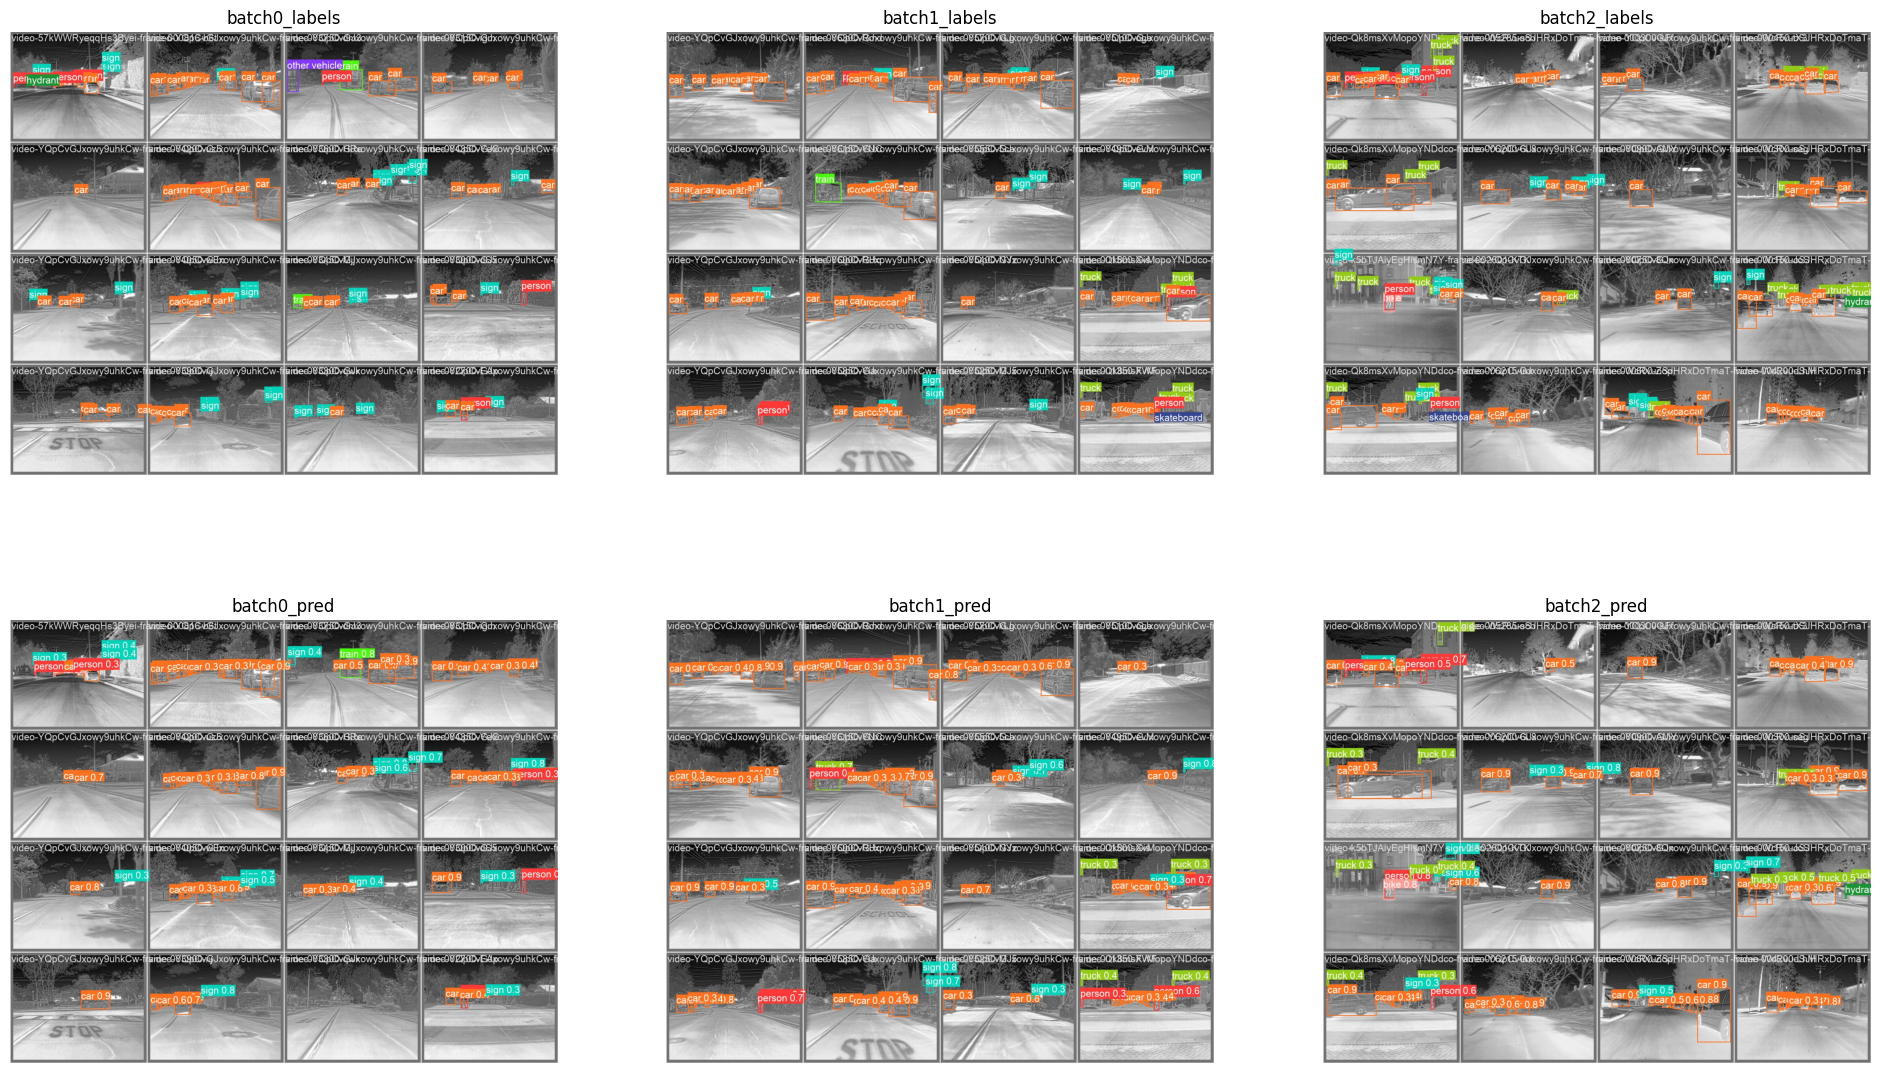

In [3]:
plt.figure(figsize=(24, 14))

im_batch0_labels = plt.imread('./assets/backbone_combined_small_val_batch0_labels.webp')
im_batch0_pred = plt.imread('./assets/backbone_combined_small_val_batch0_pred.webp')
im_batch1_labels = plt.imread('./assets/backbone_combined_small_val_batch1_labels.webp')
im_batch1_pred = plt.imread('./assets/backbone_combined_small_val_batch1_pred.webp')
im_batch2_labels = plt.imread('./assets/backbone_combined_small_val_batch2_labels.webp')
im_batch2_pred = plt.imread('./assets/backbone_combined_small_val_batch2_pred.webp')

ax = plt.subplot(2, 3, 1)
plt.title('batch0_labels')
plt.imshow(im_batch0_labels)
plt.axis("off")

ax = plt.subplot(2, 3, 2)
plt.title('batch1_labels')
plt.imshow(im_batch1_labels)
plt.axis("off")

ax = plt.subplot(2, 3, 3)
plt.title('batch2_labels')
plt.imshow(im_batch2_labels)
plt.axis("off")

ax = plt.subplot(2, 3, 4)
plt.title('batch0_pred')
plt.imshow(im_batch0_pred)
plt.axis("off")

ax = plt.subplot(2, 3, 5)
plt.title('batch1_pred')
plt.imshow(im_batch1_pred)
plt.axis("off")

ax = plt.subplot(2, 3, 6)
plt.title('batch2_pred')
plt.imshow(im_batch2_pred)
plt.axis("off")

### Model Evaluation

In [9]:
# Evaluate the model's performance on the validation set
results_s = backbone_small.val()

Ultralytics YOLOv8.0.173 🚀 Python-3.10.11 torch-2.0.1 CUDA:0 (NVIDIA GeForce GTX 1060 6GB, 6070MiB)
YOLOv8s summary (fused): 168 layers, 11131776 parameters, 0 gradients
val: Scanning /opt/app/datasets/images_combined_val/labels.cache... 2229 images, 32 backgrounds, 0 corrupt: 100%|██████████| 2229/2229 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:42<00:00,  3.28it/s]
                   all       2229      33597      0.651      0.324      0.359      0.204
                person       2229       7693      0.687      0.569       0.63      0.326
                  bike       2229        363      0.346      0.383      0.351      0.198
                   car       2229      14413      0.734      0.713      0.764      0.529
                 motor       2229        132      0.633      0.439      0.514      0.267
                 train       2229        362      0.707      0.481      0.556      0.384
    

| Class | Images | Instances | P | R | mAP50 | mAP50-95 |
| -- | -- | -- | -- | -- | -- | -- |
| all | 2229 | 33597 | 0.651 | 0.324 | 0.359 | 0.204 |
| person | 2229 | 7693 | 0.687 | 0.569 | 0.63 | 0.326 |
| bike | 2229 | 363 | 0.346 | 0.383 | 0.351 | 0.198 |
| car | 2229 | 14413 | 0.734 | 0.713 | 0.764 | 0.529 |
| motor | 2229 | 132 | 0.633 | 0.439 | 0.514 | 0.267 |
| train | 2229 | 362 | 0.707 | 0.481 | 0.556 | 0.384 |
| truck | 2229 | 4238 | 0.59 | 0.391 | 0.407 | 0.167 |
| hydrant | 2229 | 220 | 0.697 | 0.178 | 0.266 | 0.122 |
| sign | 2229 | 6053 | 0.617 | 0.329 | 0.371 | 0.205 |
| skateboard | 2229 | 7 | 1 | 0 | 0 | 0 |
| stroller | 2229 | 13 | 1 | 0 | 0.0323 | 0.024 |
| other vehicle | 2229 | 103 | 0.148 | 0.0777 | 0.0618 | 0.0193 |

> _Speed: 0.3ms preprocess, 10.3ms inference, 0.0ms loss, 0.7ms postprocess per image_

![Training the YOLOv8 Model (RGB)](./assets/backbone_combined_small_confusion_matrix_normalized.webp)

In [10]:
# Export the model to ONNX format
# success = backbone_nano.export(imgsz=(640, 480), format='onnx', opset=12, optimize=False, half=False)
# Export to PyTorch format
success = backbone_small.export(imgsz=640, format='torchscript', optimize=False, half=False, int8=False)
# TorchScript: export success ✅ 1.7s, saved as 'runs/detect/train11/weights/best.torchscript' (42.9 MB)

Ultralytics YOLOv8.0.173 🚀 Python-3.10.11 torch-2.0.1 CPU (Intel Core(TM) i7-7700 3.60GHz)

PyTorch: starting from 'runs/detect/train11/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 20, 8400) (21.5 MB)

TorchScript: starting export with torch 2.0.1...
TorchScript: export success ✅ 1.7s, saved as 'runs/detect/train11/weights/best.torchscript' (42.9 MB)

Export complete (3.3s)
Results saved to /opt/app/runs/detect/train11/weights
Predict:         yolo predict task=detect model=runs/detect/train11/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train11/weights/best.torchscript imgsz=640 data=datasets/data_combined.yaml  
Visualize:       https://netron.app
